# Filtering

## Filter out dangling ends and self-circles

In [13]:
from pytadbit.mapping.filter import filter_reads

rep = 'T0'

# this will last ~10 minutes
masked = filter_reads('results/fragment/reads12_HindIII_%s.tsv' % rep, 
                      max_molecule_length=500,
                      over_represented=0.005, max_frag_size=100000,
                      min_frag_size=100, re_proximity=5)

Filtered reads (and percentage of total):

     Mapped both                :      8630798 (100.00%)
  -----------------------------------------------------
   1- self-circle               :       160504 (  1.86%)
   2- dangling-end              :       474416 (  5.50%)
   3- error                     :        10690 (  0.12%)
   4- extra dangling-end        :      1219530 ( 14.13%)
   5- too close from RES        :      1230436 ( 14.26%)
   6- too short                 :        94196 (  1.09%)
   7- too large                 :          914 (  0.01%)
   8- over-represented          :       286737 (  3.32%)
   9- duplicated                :       436890 (  5.06%)
  10- random breaks             :      1084058 ( 12.56%)


This generates a dictionary with the different filters and the reads affected by each.

### Apply filters on the data

In [16]:
from pytadbit.mapping.filter import apply_filter

apply_filter('results/fragment/reads12_HindIII_%s.tsv' % rep, 
             'results/fragment/reads12_HindIII_%s_filtered.tsv' % rep, masked, 
             filters=[1, 2, 3, 4, 6, 7, 8, 9, 10])

    saving to file 5469557 reads without .


5469557

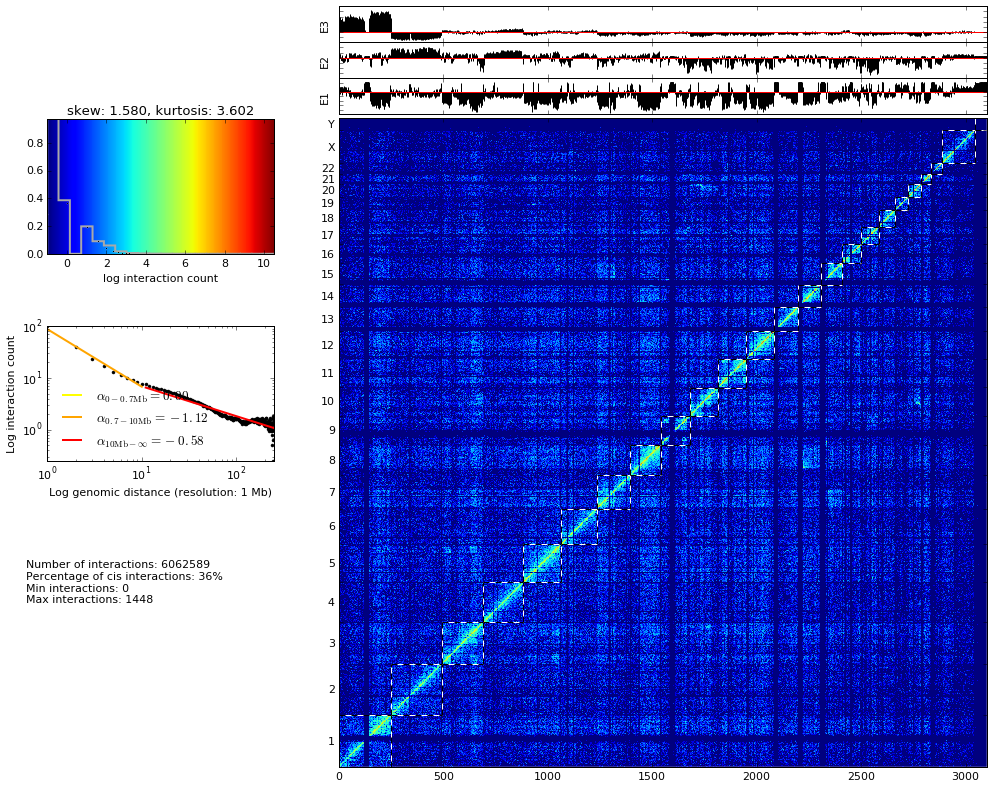

In [19]:
from pytadbit.mapping.analyze import hic_map

hic_map('results/fragment/reads12_HindIII_%s_filtered.tsv' % rep, 
        resolution=1000000, show=True)